In [1]:
import gensim

In [2]:
from gensim.models import Word2Vec

In [3]:
from gensim.models import Word2Vec
# sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]

# model = Word2Vec(min_count=1)
# model.build_vocab(sentences)  # prepare the model vocabulary
# model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)  # train word vectors
# (1, 30)

In [4]:

documents = ["Scratching and meowing the cat was purring and her fur was soft to the touch ",
             "The candle was bright and hot to the touch. It was electric ",
             "african elephants have the longer trunks",
             "the rodeo was full of horses and saddles all around",
              "the kitchen table had plates and glasses with chairs all around ",
            "Scratching and meowing the cat was purring and her fur was soft to the touch ",
             "The candle was bright and hot to the touch. It was electric ",
             "african elephants have the longest trunks of all ",
             "the rodeo was full of horses and saddles ",
              "the kitchen table had plates and glasses with chairs all around ",
             "the rodeo was full of horses and saddles ",
             "The candle was bright and hot to the touch. It was electric and longer than others",
              "the kitchen table had plates and glasses with chairs all around "
             "african elephants have the longer trunks ",
            "Scratching and meowing the cat was purring and her fur was soft to the touch "]


In [132]:
sent_tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]

In [6]:
#tokenized_docs

In [133]:
model = Word2Vec(min_count=1)
#model = gensim.models.Word2Vec(sentences = sent_tokenized_docs, size=10, window=4,min_count=1, sg=1)
#model = Word2Vec(tokenized_docs, min_count=1)

In [134]:
model.build_vocab(sent_tokenized_docs)  # prepare the model vocabulary


In [135]:

model.train(sent_tokenized_docs, total_examples=model.corpus_count, epochs=model.epochs)  # train word vectors
(1, 30)

(1, 30)

In [136]:
model_output = model.predict_output_word(['horses'], topn=4)

In [137]:
import pandas as pd
pd.DataFrame(model_output)

,0,1
0,mwwizw,0.000024
1,mx,0.000022
2,mm,0.000022
3,dvbtpuc,0.000021


In [138]:
#model.similar_by_word('cat', topn=3)

In [139]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [140]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
X_tfidf = vectorizer.fit_transform(documents)

In [36]:
#X_tfidf.todense()

matrix([[0.   , 0.   , 0.   , 0.39 , 0.   , 0.   , 0.   , 0.39 , 0.   ,
         0.   , 0.   , 0.   , 0.   , 0.   , 0.39 , 0.   , 0.39 , 0.   ,
         0.   , 0.39 , 0.39 , 0.   , 0.296, 0.   ],
        [0.   , 0.467, 0.467, 0.   , 0.   , 0.467, 0.   , 0.   , 0.   ,
         0.   , 0.467, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.   , 0.355, 0.   ],
        [0.5  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.   , 0.   , 0.5  ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.577, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.577,
         0.577, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.447, 0.   , 0.   , 0.   , 0.447,
         0.   , 0.   , 0.447, 0.   , 0.   , 0.   , 0.447, 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.447, 0.   , 0.   ],
        [0.   , 0.  

In [141]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000000',
 '0000000004',
 '0000000005',
 '00000000b',
 '00000001',
 '00000001b',
 '0000000667',
 '00000010',
 '00000010b',
 '00000011',
 '00000011b',
 '0000001200',
 '00000074',
 '00000093',
 '000000e5',
 '00000100',
 '00000100b',
 '00000101',
 '00000101b',
 '00000110',
 '00000110b',
 '00000111',
 '00000111b',
 '00000315',
 '000005102000',
 '00000510200001',
 '000007',
 '00000ee5',
 '00001000',
 '00001000b',
 '00001001',
 '00001001b',
 '00001010',
 '00001010b',
 '00001011',
 '00001011b',
 '000010af',
 '00001100',
 '00001100b',
 '00001101',
 '00001101b',
 '00001110',
 '00001110b',
 '00001111',
 '00001111b',
 '000021',
 '000042',
 '000062david42',
 '000094',
 '0000vec',
 '0001',
 '00010000',
 '00010000b',
 '00010001',
 '00010001b',
 '00010010',
 '00010010b',
 '00010011',
 '00010011b',
 '000100255pixel',
 '00010100',
 '00010100b',
 '00010101',
 '00010101b',
 '00010110',
 '00010110b',
 '00010111',
 '00010111b',
 '00011000',
 '00011000b',
 '00

In [142]:
import numpy as np
# How do these two representations compare?
# Let's look at the first 50 dimensions of the first document to gain some intuition

np.set_printoptions(precision=3) # This just makes things a little easier to read

#print(f"CountVector: {X.toarray()[0,0:50]}\n\n")

print(f"TFIDF: {X_tfidf.toarray()[0,0:50]}")

TFIDF: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [143]:
X_tfidf.shape

(11314, 129796)

In [144]:
print(f"TFIDF: {X_tfidf.toarray()[:,:]}")

TFIDF: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
import seaborn as sns

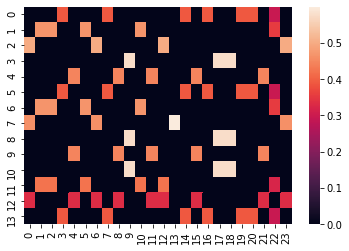

In [ ]:
df = pd.DataFrame(X_tfidf.toarray()[:,:], columns = vectorizer.get_feature_names()).corr()

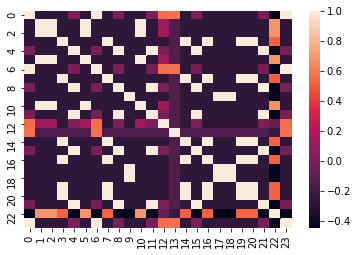

In [47]:
import pickle
with open("data/" + "newsgroup_tfidf_corr_matrix_df.pickle", 'wb') as to_write:
        pickle.dump(df, to_write)

In [117]:
img_label = 'purring'
related_words = df.nlargest(4,img_label).index.to_list()

In [118]:
related_words.remove(img_label)
related_words

['cat', 'fur', 'meowing']

TypeError: object of type 'NoneType' has no len()

In [116]:
df

,african,bright,candle,cat,chairs,electric,elephants,fur,glasses,horses,...,meowing,plates,purring,rodeo,saddles,scratching,soft,table,touch,trunks
african,1.000000,-0.267756,-0.267756,-0.268113,-0.005793,-0.267756,1.000000,-0.268113,-0.005793,-0.268113,...,-0.268113,-0.005793,-0.268113,-0.268113,-0.268113,-0.268113,-0.268113,-0.005793,-0.442003,1.000000
bright,-0.267756,1.000000,1.000000,-0.272364,-0.269430,1.000000,-0.267756,-0.272364,-0.269430,-0.272364,...,-0.272364,-0.269430,-0.272364,-0.272364,-0.272364,-0.272364,-0.272364,-0.269430,0.679177,-0.267756
candle,-0.267756,1.000000,1.000000,-0.272364,-0.269430,1.000000,-0.267756,-0.272364,-0.269430,-0.272364,...,-0.272364,-0.269430,-0.272364,-0.272364,-0.272364,-0.272364,-0.272364,-0.269430,0.679177,-0.267756
cat,-0.268113,-0.272364,-0.272364,1.000000,-0.269789,-0.272364,-0.268113,1.000000,-0.269789,-0.272727,...,1.000000,-0.269789,1.000000,-0.272727,-0.272727,1.000000,1.000000,-0.269789,0.521242,-0.268113
chairs,-0.005793,-0.269430,-0.269430,-0.269789,1.000000,-0.269430,-0.005793,-0.269789,1.000000,-0.269789,...,-0.269789,1.000000,-0.269789,-0.269789,-0.269789,-0.269789,-0.269789,1.000000,-0.444767,-0.005793
electric,-0.267756,1.000000,1.000000,-0.272364,-0.269430,1.000000,-0.267756,-0.272364,-0.269430,-0.272364,...,-0.272364,-0.269430,-0.272364,-0.272364,-0.272364,-0.272364,-0.272364,-0.269430,0.679177,-0.267756
elephants,1.000000,-0.267756,-0.267756,-0.268113,-0.005793,-0.267756,1.000000,-0.268113,-0.005793,-0.268113,...,-0.268113,-0.005793,-0.268113,-0.268113,-0.268113,-0.268113,-0.268113,-0.005793,-0.442003,1.000000
fur,-0.268113,-0.272364,-0.272364,1.000000,-0.269789,-0.272364,-0.268113,1.000000,-0.269789,-0.272727,...,1.000000,-0.269789,1.000000,-0.272727,-0.272727,1.000000,1.000000,-0.269789,0.521242,-0.268113
glasses,-0.005793,-0.269430,-0.269430,-0.269789,1.000000,-0.269430,-0.005793,-0.269789,1.000000,-0.269789,...,-0.269789,1.000000,-0.269789,-0.269789,-0.269789,-0.269789,-0.269789,1.000000,-0.444767,-0.005793
horses,-0.268113,-0.272364,-0.272364,-0.272727,-0.269789,-0.272364,-0.268113,-0.272727,-0.269789,1.000000,...,-0.272727,-0.269789,-0.272727,1.000000,1.000000,-0.272727,-0.272727,-0.269789,-0.449610,-0.268113


In [119]:
def get_related_words(df_, img_label_word):
    related_words = df.nlargest(4,img_label_word).index.to_list()
    related_words.remove(img_label_word)
    return related_words

In [120]:
get_related_words(df, 'purring')

['cat', 'fur', 'meowing']

In [121]:
from sklearn.datasets import fetch_20newsgroups
#categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
#twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_train = fetch_20newsgroups(subset='train',shuffle=True, random_state=42)

#corpus = twenty_train.data[0:50]
corpus = twenty_train.data[0:]

In [131]:
documents = corpus